In [360]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit_data(func, xdata, ydata, p0=None):
    """
    Fits a function to a set of data points using least squares optimization.

    Parameters:
    func : callable
        The function to be fitted to the data.
    xdata : array_like
        The x data points.
    ydata : array_like
        The y data points.
    p0 : array_like, optional
        An initial guess for the function parameters.

    Returns:
    popt : ndarray
        The optimal values for the function parameters.
    pcov : ndarray
        The estimated covariance of popt.
    rms : float
        The root mean square error between the fitted function and the data.
    """
    popt, pcov = curve_fit(func, xdata, ydata, p0=p0)
    yfit = func(xdata, *popt)
    rms = np.sqrt(np.mean((ydata - yfit)**2))
    plt.scatter(xdata, ydata, color='k',label='Data')
    xdata=np.linspace(0,1.5*np.max(xdata),100)
    yfit = func(xdata, *popt)
    plt.plot(xdata, yfit, 'r-',label='Model')
    plt.legend()
    #plt.plot(np.linspace(0,2*np.max(xdata),100), func(np.linspace(0,10,100), *popt), 'r-')
    plt.show()
    return popt, pcov, rms


The first normal equation is:


Eq(-2*2**b*(-2**b*a + 3) - 2*4**b*(-4**b*a + 6) - 2*6**b*(-6**b*a + 10), 0)

The second normal equation is:


Eq(-2*2**b*a*(-2**b*a + 3)*log(2) - 2*4**b*a*(-4**b*a + 6)*log(4) - 2*6**b*a*(-6**b*a + 10)*log(6), 0)

After solving them:


1.27191203828267*x**1.14580675806361

when x = 8, then y = 13.7791899817041


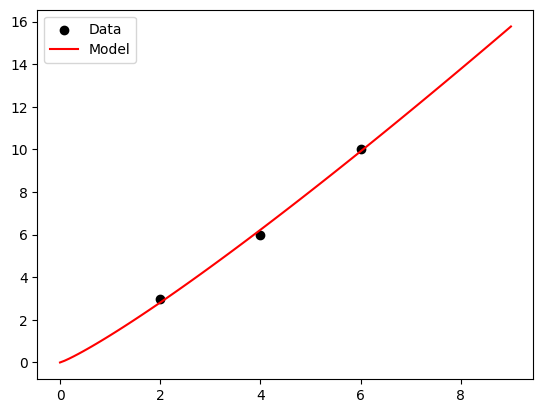

In [362]:
import sympy as sp

# Define the function
x, a,b = sp.symbols('x a b')
f = a*x**b

# Data points
xi= np.array([2,4,6])
yi = np.array([3,6,10])

# The to-minimized equation
phi=sum([(yi[i]-a*sp.Pow(xi[i],b))**2 for i in range(len(xi))])
# Take the partial derivative of phi with respect to a, b
sol_a = sp.solve([sp.diff(phi, a)], (a))[a].subs(sp.solve([sp.diff(phi, a)], (a)))
sol_b = sp.nsolve(sp.diff(phi, b).subs(a,sol_a).simplify(), 0)
print('The first normal equation is:')
display(sp.Eq(sp.diff(phi, a),0))
print('The second normal equation is:')
display(sp.Eq(sp.diff(phi,b),0))

# Print the result
print('After solving them:')
display(sol_a.subs(b,sol_b)*x**sol_b)

# Find y at x = 8
print('when x = 8, then y =',(sol_a.subs(b,sol_b)*x**sol_b).subs(x,8))

# Plot
plt.scatter(xi, yi, color='k',label='Data')
xi=np.linspace(0,1.5*np.max(xi),100)
yfit = sol_a.subs(b,sol_b)*xi**sol_b
plt.plot(xi, yfit, 'r-',label='Model')
plt.legend()
#plt.plot(np.linspace(0,2*np.max(xdata),100), func(np.linspace(0,10,100), *popt), 'r-')
plt.show()

before linearization: 


Eq(y, a*x**b)

after linearization: 


Eq(ytilde, atilde + btilde*xtilde)

Where: 


Eq(b, btilde)

Eq(a, exp(atilde))

when x = 8, then y = 12.248935824765804


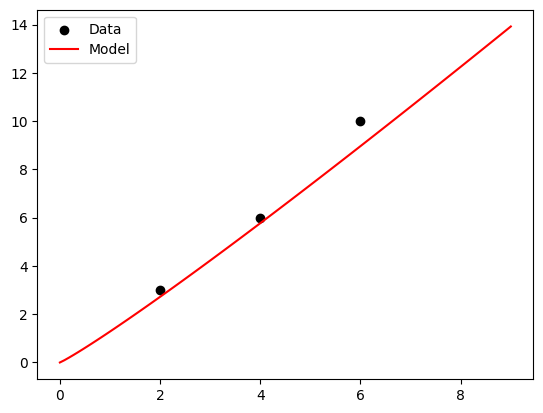

In [365]:
x, a,b,y, bb,aa,yy,xx = sp.symbols('x a b y btilde atilde ytilde xtilde')
xtilde= sym.symbols("xtilde ")
print('before linearization: ')
display(sp.Eq(y, a*x**b))
print('after linearization: ')
display(sp.Eq(yy, bb*xx+aa))
print('Where: ')
display(sp.Eq(b,bb))
display(sp.Eq(a,sp.E**aa))
f = sp.log(a)+b*sp.log(x)
x= np.array([2,4,6])
xi=np.log(x)
y = np.array([3,6,10])
yi=np.log(y)
m=(len(xi)*sum(xi[i]*yi[i] for i in range(len(xi)))-sum(xi[i] for i in range(len(xi)))*sum(yi[i] for i in range(len(xi))))/(len(xi)*sum(xi[i]**2 for i in range(len(xi)))-sum(xi[i] for i in range(len(xi)))**2)
b=(sum(yi[i] for i in range(len(xi)))-m*sum(xi[i] for i in range(len(xi))))/len(xi)
# Plot
plt.scatter(x, y, color='k',label='Data')
xii=np.linspace(0,1.5*np.max(x),100)
yfit = np.e**b/m*xii**m
plt.plot(xii, yfit, 'r-',label='Model')
#plt.plot(np.linspace(0,2*np.max(xdata),100), func(np.linspace(0,10,100), *popt), 'r-')
print('when x = 8, then y =',(np.e**b/m*8**m))
plt.legend()
plt.show()

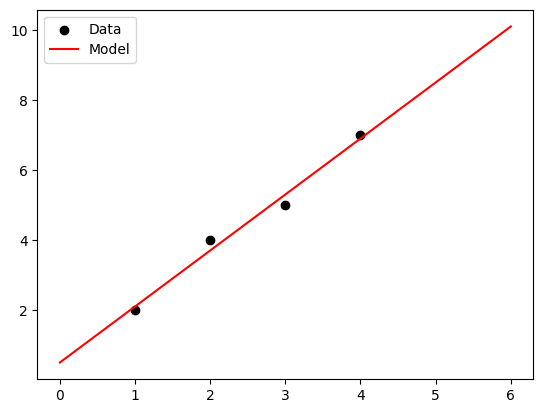

Optimal values for parameters: y = 1.600*x + 0.500
RMS error: 0.2236067977499788


In [366]:
# Define the function to be fitted
def my_func(x, a, b):
    return a*x+b

# Provide data points
xdata = np.array([1,2,3,4])
ydata = np.array([2,4,5,7])

# Call the fit_data function to fit the data to the function
popt, pcov, rms = fit_data(my_func, xdata, ydata)

# Print the optimal values for the function parameters and the RMS error
print("Optimal values for parameters: y = %.3f*x + %.3f" %(popt[0],popt[1]))
print("RMS error:", rms)


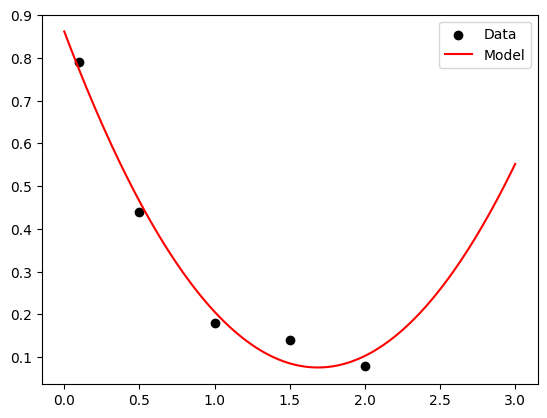

Optimal values for parameters: y = 0.276*x^2 + -0.932*x + 0.862
RMS error: 0.032090926481747974


In [367]:
# Define the function to be fitted
def my_func(x, a, b,c):
    return a*x**2+b*x+c

# Provide data points
xdata = np.array([0.1,0.5,1.0,1.5,2.0])
ydata = np.array([0.79,0.44,0.18,0.14,0.08])

# Call the fit_data function to fit the data to the function
popt, pcov, rms = fit_data(my_func, xdata, ydata)

# Print the optimal values for the function parameters and the RMS error
print("Optimal values for parameters: y = %.3f*x^2 + %.3f*x + %.3f" %(popt[0],popt[1],popt[2]))
print("RMS error:", rms)

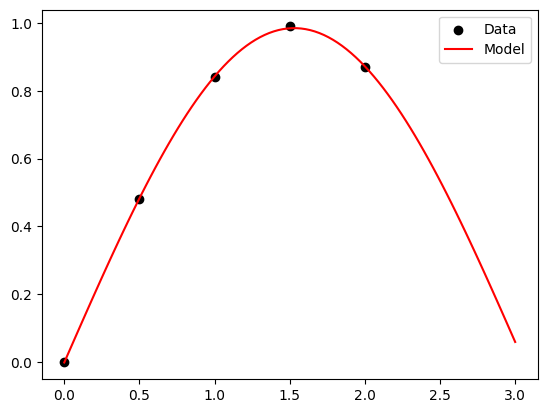

Optimal values for parameters: a = 0.985; b = 1.028; c = -0.002
RMS error: 0.0031951295182000676


In [368]:
# Define the function to be fitted
def my_func(x, a, b,c):
    return a*np.sin(b*x+c)

# Provide data points
xdata = np.array([0,0.5,1.0,1.5,2.0])
ydata = np.array([0,0.48,0.84,0.99,0.87])

# Call the fit_data function to fit the data to the function
popt, pcov, rms = fit_data(my_func, xdata, ydata)

# Print the optimal values for the function parameters and the RMS error
print("Optimal values for parameters: a = %.3f; b = %.3f; c = %.3f" %(popt[0],popt[1],popt[2]))
print("RMS error:", rms)

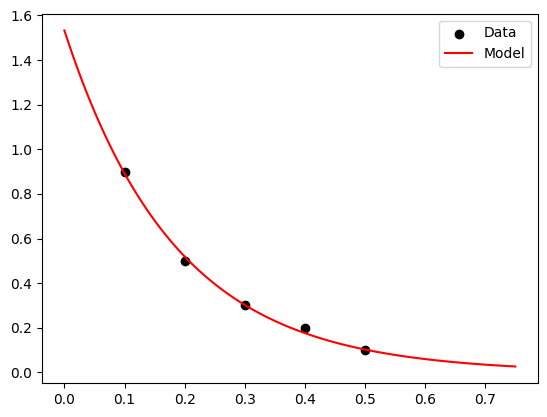

Optimal values for parameters: A = 1.533; b = 5.409
RMS error: 0.014308033836558114


In [369]:
# Define the function to be fitted
def my_func(x, A, b):
    return A*np.exp(-b*x)

# Provide data points
xdata = np.array([0.1,0.2,0.3,0.4,0.5])
ydata = np.array([0.9,0.5,0.3,0.2,0.1])

# Call the fit_data function to fit the data to the function
popt, pcov, rms = fit_data(my_func, xdata, ydata)

# Print the optimal values for the function parameters and the RMS error
print("Optimal values for parameters: A = %.3f; b = %.3f" %(popt[0],popt[1]))
print("RMS error:", rms)